# Check motion in HNU1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Paths
raw_path = '/data1/guilimin/data/hnu1/preproc_20161103/fmri_nii/'
motion_path = '/data1/guilimin/data/hnu1/preproc_20161103/quality_control/group_motion/qc_scrubbing_group.csv'
pheno_path = '/data1/guilimin/data/hnu1/pheno/hnu1_pheno.csv'
qc_path = '/data1/guilimin/data/hnu1/pheno/sub_id_qc.csv'
pheno_out = '/data1/guilimin/data/hnu1/pheno/combined_pheno_hnu1.csv'

In [4]:
motion = pd.read_csv(motion_path)

In [5]:
motion.rename(columns={' ':'File_ID'}, inplace=True)
motion['SUBID'] = motion['File_ID'].str.extract('([0-9]+)').astype(int)
motion['Session'] = motion['File_ID'].str.extract('((?<=session)[0-9]+)').astype(int)

/home/surchs/Venv/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/home/surchs/Venv/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


## Get an overview of motion by session

/home/surchs/Venv/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


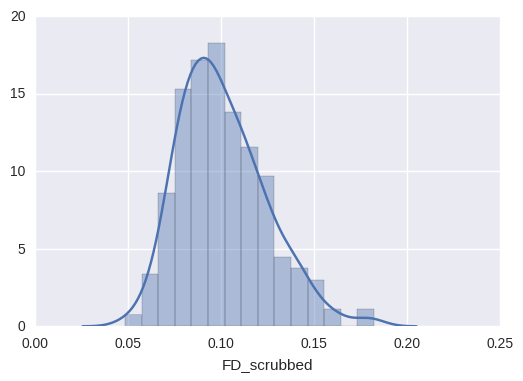

In [27]:
tmp = sns.distplot(motion.FD_scrubbed)

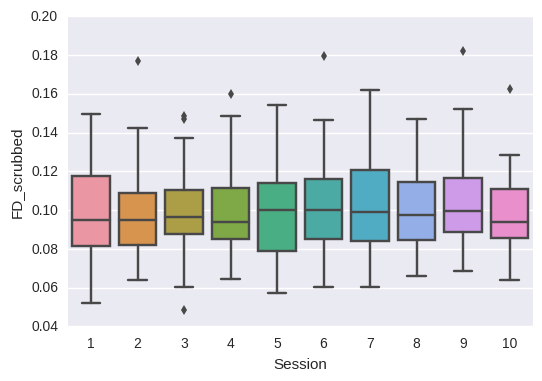

In [28]:
sns.boxplot(x='Session', y='FD_scrubbed', data=motion)

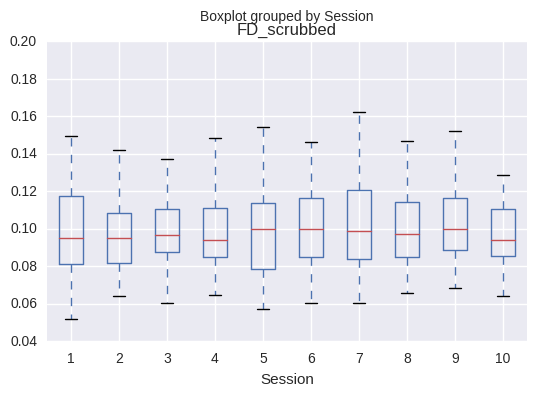

In [6]:
motion.boxplot('FD_scrubbed', by='Session')

Motion looks pretty cool. Not a lot of change across sessions, not a lot of changes. Let's look at associations

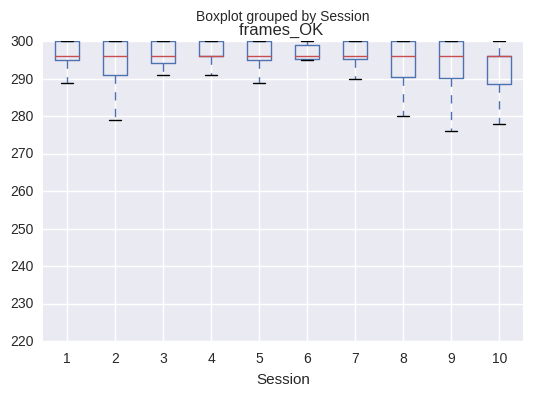

In [7]:
motion.boxplot('frames_OK ', by='Session')

In [8]:
pheno = pd.read_csv(pheno_path)

In [9]:
merged = pd.merge(pheno, motion, on='SUBID')

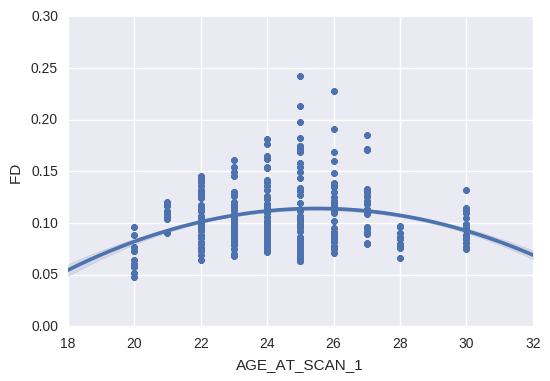

In [10]:
sns.regplot(x='AGE_AT_SCAN_1', y='FD ', data=merged, order=2)

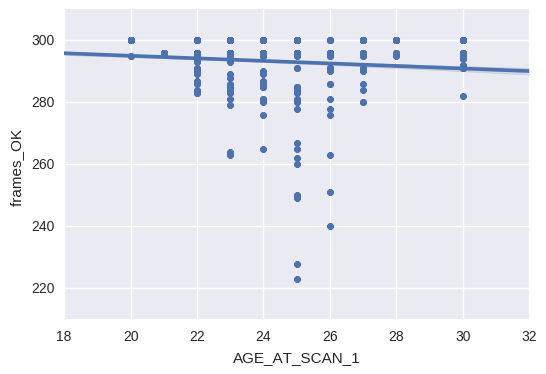

In [11]:
sns.regplot(x='AGE_AT_SCAN_1', y='frames_OK ', data=merged, order=1)

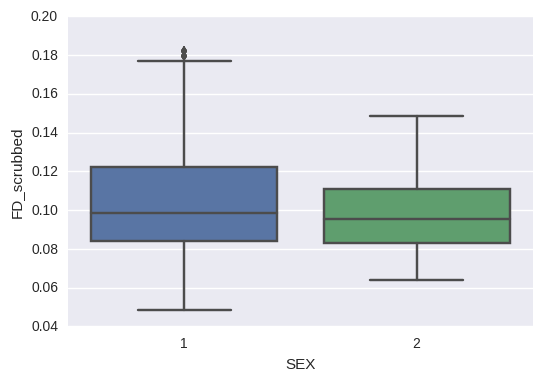

In [12]:
sns.boxplot(x='SEX', y='FD_scrubbed', data=merged)

In [13]:
# Get QC
qc = pd.read_csv(qc_path)

In [14]:
qc.head()

,Subject,T1,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,25427,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25428,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25429,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25430,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25431,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
qc.rename(columns={'Subject':'SUBID'}, inplace=True)

In [16]:
more = pd.merge(merged, qc, on='SUBID')

In [17]:
more.head()

,SUBID,SESSION,AGE_AT_SCAN_1,SEX,DSM_IV_TR,FIQ,VIQ,PIQ,BMI,RESTING_STATE_INSTRUCTION,...,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,25427,Baseline,23,2,#,#,#,#,#,'Relax and remain still with your eyes open. D...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25427,Baseline,23,2,#,#,#,#,#,'Relax and remain still with your eyes open. D...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25427,Baseline,23,2,#,#,#,#,#,'Relax and remain still with your eyes open. D...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25427,Baseline,23,2,#,#,#,#,#,'Relax and remain still with your eyes open. D...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25427,Baseline,23,2,#,#,#,#,#,'Relax and remain still with your eyes open. D...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
more['Tqc'] = more.T1.replace({'OK':1, 'MAYBE':2, 'FAIL':3})

In [19]:
more.Tqc.value_counts()

1    1900
2    1000
3     100
Name: Tqc, dtype: int64

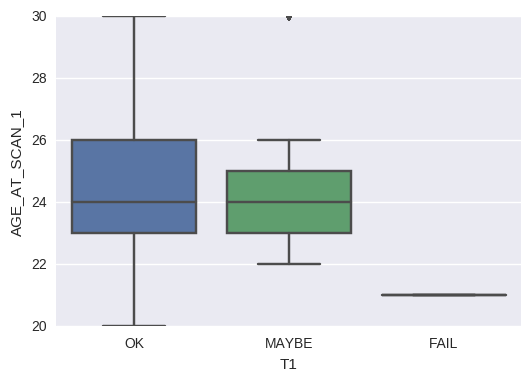

In [20]:
sns.boxplot(x='T1', y='AGE_AT_SCAN_1', data=more)

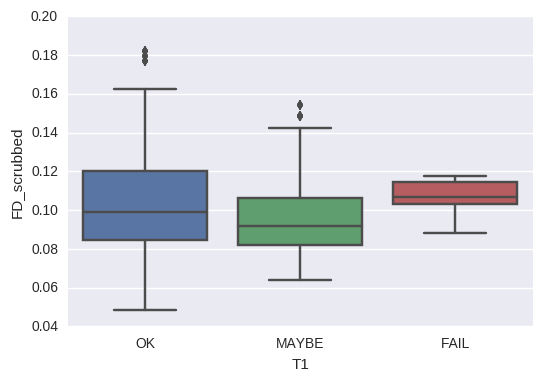

In [21]:
sns.boxplot(x='T1', y='FD_scrubbed', data=more)

Overall, I'd say that this dataset looks pretty promising

In [22]:
more.to_csv(pheno_out, index=False)